ЗОДАЧИ НА ЗАВТРО:
ИЗ ДАТАССЕТА ИЩУ ВЕРМЯ ИГР И ПРАЙМТАЙМ ГЕРОЕВ(СЛОВАРЬ)(EARLY,MID,LATE) И ИХ ВИНРЕЙТ ДЛЯ ЭТИХ ЗНАЧЕНИЙ
ФУНКЦИЯ СР ВИНРЕЙТА ЧАРОВ В EARLY MID LATE У РАДИАНТ И ДАЙР

ПОДРЕДАКТИРУЙ ФУНКЦИЮ PREDICTION(ВЕРОЯТНОСТЬ ПОБЕДЫ В EARLY MID LATE) ДЛЯ КАЖДОГО ЭТАПА ИГРЫ

УДАЧИ НАХЕР КОЛИЧЕСТВО РЕНЖЕЙ


ПРИ ОБУЧЕНИИ ТАРГЕТ-ВРЕМЯ ИГРЫ, ДАТА-ПРОЦЕНТЫ СИЛЫ В ТАЙМ

In [7]:
import numpy as np
import pandas as pd
from enum import Enum
from itertools import combinations, product

In [ ]:
class dota(Enum):
  ANTIMAGE = 1
  AXE = 2
  BANE = 3
  BLOODSEEKER = 4
  CRYSTAL_MAIDEN = 5
  DROW_RANGER = 6
  EARTHSHAKER = 7
  JUGGERNAUT = 8
  MIRANA = 9
  MORPHLING = 10
  SHADOW_FIEND = 11
  PHANTOM_LANCER = 12
  PUCK = 13
  PUDGE = 14
  RAZOR = 15
  SAND_KING = 16
  STORM_SPIRIT = 17
  SVEN = 18
  TINY = 19
  VENGEFULSPIRIT = 20
  WINDRUNNER = 21
  ZUUS = 22
  KUNKKA = 23
  LINA = 25
  LION = 26
  SHADOW_SHAMAN = 27
  SLARDAR = 28
  TIDEHUNTER = 29
  WITCH_DOCTOR = 30
  LICH = 31
  RIKI = 32
  ENIGMA = 33
  TINKER = 34
  SNIPER = 35
  NECROPHOS = 36
  WARLOCK = 37
  BEASTMASTER = 38
  QUEENOFPAIN = 39
  VENOMANCER = 40
  FACELESS_VOID = 41
  WRAITH_KING = 42
  DEATH_PROPHET = 43
  PHANTOM_ASSASSIN = 44
  PUGNA = 45
  TEMPLAR_ASSASSIN = 46
  VIPER = 47
  LUNA = 48
  DRAGON_KNIGHT = 49
  DAZZLE = 50
  CLOCKWERK = 51
  LESHRAC = 52
  FURION = 53
  LIFE_STEALER = 54
  DARK_SEER = 55
  CLINKZ = 56
  OMNIKNIGHT = 57
  ENCHANTRESS = 58
  HUSKAR = 59
  NIGHT_STALKER = 60
  BROODMOTHER = 61
  BOUNTY_HUNTER = 62
  WEAVER = 63
  JAKIRO = 64
  BATRIDER = 65
  CHEN = 66
  SPECTRE = 67
  ANCIENT_APPARITION = 68
  DOOM = 69
  URSA = 70
  SPIRIT_BREAKER = 71
  GYROCOPTER = 72
  ALCHEMIST = 73
  INVOKER = 74
  SILENCER = 75
  OUTWORLD_DESTROYER = 76
  LYCAN = 77
  BREWMASTER = 78
  SHADOW_DEMON = 79
  LONE_DRUID = 80
  CHAOS_KNIGHT = 81
  MEEPO = 82
  TREANT = 83
  OGRE_MAGI = 84
  UNDYING = 85
  RUBICK = 86
  DISRUPTOR = 87
  NYX_ASSASSIN = 88
  NAGA_SIREN = 89
  KEEPER_OF_THE_LIGHT = 90
  WISP = 91
  VISAGE = 92
  SLARK = 93
  MEDUSA = 94
  TROLL_WARLORD = 95
  CENTAUR = 96
  MAGNATAUR = 97
  SHREDDER = 98
  BRISTLEBACK = 99
  TUSK = 100
  SKYWRATH_MAGE = 101
  ABADDON = 102
  ELDER_TITAN = 103
  LEGION_COMMANDER = 104
  TECHIES = 105
  EMBER_SPIRIT = 106
  EARTH_SPIRIT = 107
  UNDERLORD = 108
  TERRORBLADE = 109
  PHOENIX = 110
  ORACLE = 111
  WINTER_WYVERN = 112
  ARC_WARDEN = 113
  MONKEY_KING = 114
  DARK_WILLOW = 119
  PANGOLIER = 120
  GRIMSTROKE = 121
  HOODWINK = 123
  VOID_SPIRIT = 126
  SNAPFIRE = 128
  MARS = 129
  RINGMASTER = 131
  DAWNBREAKER = 135
  MARCI = 136
  PRIMAL_BEAST = 137
  MUERTA = 138
  KEZ = 145

In [8]:
players2025 = pd.read_csv("data/players2025.csv")
players202601 = pd.read_csv("data/players202601.csv")
main_metadata2025 = pd.read_csv("data/main_metadata2025.csv")
main_metadata202601 = pd.read_csv("data/main_metadata202601.csv")
heroesdf = pd.read_csv("data/Constants.Heroes.csv")

players = pd.concat([players2025, players202601])
matches = pd.concat([main_metadata2025, main_metadata202601])

C:\Users\anton\AppData\Local\Temp\ipykernel_20832\770066594.py:1: DtypeWarning: Columns (0: randomed, 1: pred_vict, 2: neutral_item_history, 3: is_roaming, 4: repicked) have mixed types. Specify dtype option on import or set low_memory=False.
  players2025 = pd.read_csv("data/players2025.csv")


In [9]:
heroes = heroesdf.melt(id_vars='id',value_vars='name')
heroes = dict(zip(heroes['id'],heroes['value']))
players['hero_name'] = players['hero_id'].apply(lambda x: heroes.get(x))

attack_type = heroesdf.melt(id_vars='id',value_vars='attack_type')
attack_type = dict(zip(attack_type['id'],attack_type['value']))
players['hero_attack_type'] = players['hero_id'].apply(lambda x: attack_type.get(x))
players

,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,match_id,leagueid,purchase_gem,additional_units,purchase_rapier,performance_others,repicked,computed_mmr,hero_name,hero_attack_type
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,8107483721,17163,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_axe,Melee
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,8107483721,17163,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_nevermore,Ranged
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,8107483721,17163,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_troll_warlord,Ranged
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,8107483721,17163,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_warlock,Ranged
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,8107483721,17163,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_skywrath_mage,Ranged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,128,1.0,0.0,8.0,3.0,0.0,0.0,0.500000,0.0,0.0,...,8645872998,19089,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_troll_warlord,Ranged
10106,129,0.0,2.0,8.0,2.0,0.0,1.0,0.571429,0.0,0.0,...,8645872998,19089,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_huskar,Ranged
10107,130,0.0,1.0,3.0,1.0,2.0,0.0,0.428571,0.0,0.0,...,8645872998,19089,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_shredder,Melee
10108,131,5.0,9.0,0.0,0.0,1.0,0.0,0.642857,0.0,0.0,...,8645872998,19089,NaN,NaN,NaN,NaN,NaN,NaN,npc_dota_hero_shadow_shaman,Ranged


In [ ]:
def synergy(team: list):
    team = np.sort(np.array(team, dtype=np.int16))
    pairs = np.array(list(combinations(team, 2)), dtype=np.int16)
    values = np.fromiter(
        (pair_synergy.get((a, b), 0.5) for a, b in pairs),
        dtype=np.float32,
        count=len(pairs)
    )
    return values.mean()

In [ ]:
def counter_synergy(radiant, dire):
  values = np.fromiter(
      (matchup_synergy.get((a,b), 0.0) for a,b in product(radiant,dire)),
      dtype = np.float32
  )
  return values.mean()

In [ ]:
def time_strenght(team, duration, duration_ind = 0):
  if duration_ind == 0:
    if duration < 25:
        values = np.array([hero_stats_time.get(a, {}).get(1, 0.0) for a in team], dtype=np.float32)
    elif duration >= 25 and duration < 30:
        values = np.array([hero_stats_time.get(a, {}).get(2, 0.0) for a in team], dtype=np.float32)
    elif duration >= 30 and duration < 32.5:
        values = np.array([hero_stats_time.get(a, {}).get(3, 0.0) for a in team], dtype=np.float32)
    elif duration >= 32.5 and duration < 35:
        values = np.array([hero_stats_time.get(a, {}).get(4, 0.0) for a in team], dtype=np.float32)
    elif duration >= 35 and duration < 37.5:
        values = np.array([hero_stats_time.get(a, {}).get(5, 0.0) for a in team], dtype=np.float32)
    elif duration >= 37.5 and duration < 40:
        values = np.array([hero_stats_time.get(a, {}).get(6, 0.0) for a in team], dtype=np.float32)
    elif duration >= 40 and duration < 50:
        values = np.array([hero_stats_time.get(a, {}).get(7, 0.0) for a in team], dtype=np.float32)
    elif duration >= 50:
        values = np.array([hero_stats_time.get(a, {}).get(8, 0.0) for a in team], dtype=np.float32)
  else:
    values = np.array([hero_stats_time.get(a, {}).get(duration_ind, 0.0) for a in team], dtype=np.float32)
  return values.mean()

In [ ]:
'''
data [r1,r2,r3,r4,r5,d1,d2,d3,d4,d5]
target win (0 - radiant 1 dire)
'''
df = players.merge(matches, left_on='match_id', right_on='match_id', how = 'left')
df.rename(columns = {'duration_x':'duration'}, inplace = True )
df.rename(columns = {'radiant_win_x':'radiant_win'}, inplace = True )
df['duration'] = (df['duration'] / 60)
df['isRadiant'] = np.where(df['isRadiant']==True, '1', '0').astype(int)
df.rename(columns = {'isRadiant':'teams'}, inplace = True )
df['radiant_win'] = np.where(df['radiant_win']==True, '1', '0').astype(int)
df['ranged'] = np.where(df['hero_attack_type']=='Ranged', '1', '0').astype(int)

df = df[['match_id', 'hero_id', 'hero_name', 'ranged','player_slot', 'teams',
             'win', 'radiant_win','duration']]

df['id'] = df.groupby('match_id').ngroup()

In [ ]:
data = (df.assign(player_slot=df["player_slot"] +(df.groupby(["id", "player_slot"])
.cumcount()+1))
.pivot_table(index="id", columns="player_slot",values="hero_id"))
data.columns = range(data.shape[1])
data.columns = ['r_1','r_2','r_3','r_4','r_5','d_1','d_2','d_3','d_4','d_5']
data = data.merge(df[['id', 'duration']].drop_duplicates(subset=['id']), on='id', how='left')

In [ ]:
target = df.groupby('id').min()[['radiant_win']]
target

,radiant_win
id,
0,1
1,1
2,1
3,1
4,0
...,...
5560,0
5561,1
5562,1


In [ ]:
teams_data = []
for index, row in data.iterrows():
    teams_data.append([row[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].astype(int).tolist()] + [row[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].astype(int).tolist()] + [target.loc[index, 'radiant_win']] + [row['duration']])
teams = pd.DataFrame(teams_data, columns=['radiant', 'dire','radiant_win','duration'])
teams

,radiant,dire,radiant_win,duration
0,"[65, 86, 14, 49, 48]","[9, 114, 46, 87, 42]",1,35.150000
1,"[71, 53, 55, 81, 110]","[77, 114, 43, 131, 100]",1,31.550000
2,"[86, 46, 109, 87, 69]","[105, 96, 14, 67, 21]",1,27.683333
3,"[84, 11, 131, 114, 21]","[68, 62, 69, 109, 23]",1,26.350000
4,"[50, 2, 89, 17, 46]","[119, 78, 16, 100, 11]",0,23.583333
...,...,...,...,...
5560,"[70, 30, 98, 100, 47]","[22, 54, 31, 50, 137]",0,31.283333
5561,"[74, 97, 21, 128, 51]","[22, 84, 14, 49, 46]",1,25.883333
5562,"[11, 104, 84, 14, 42]","[13, 48, 53, 86, 51]",1,30.483333
5563,"[102, 119, 11, 74, 84]","[42, 64, 27, 25, 54]",0,32.700000


In [ ]:
pair_stats = {}

for i, row in teams.iterrows():
  for a,b in combinations(sorted(row['radiant']), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches']+=1
    if row['radiant_win'] == 1:
      pair_stats[(a,b)]['wins'] += 1

  for a,b in combinations(sorted(row['dire']), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches'] += 1
    if row['radiant_win'] == 0:
      pair_stats[(a,b)]['wins'] += 1

pair_synergy = {}

for pair, stats in pair_stats.items():
  if stats['matches'] >= 10:
    pair_synergy[pair] = stats['wins']/stats['matches']

In [ ]:
matchup_stats = {}
hero_stats = {}
for i, row in teams.iterrows():
  radiant = row['radiant']
  dire = row['dire']
  radiant_win = row['radiant_win']

  for hero in radiant:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 1:
      hero_stats[hero]['wins'] += 1

  for hero in dire:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 0:
      hero_stats[hero]['wins'] += 1

  for a, b in product(radiant, dire):
    pair = (a,b)
    if pair not in matchup_stats:
      matchup_stats[pair] = {'matches': 0 , 'wins': 0}
    matchup_stats[pair]['matches'] += 1
    if radiant_win == 1:
      matchup_stats[pair]['wins'] += 1

matchup_synergy = {}

for (a,b), stats in matchup_stats.items():
  w, m = stats['wins'], stats['matches']

  if m==0 or hero_stats[a]['matches'] == 0:
    continue

  matchup_synergy[(a,b)] = w / m - hero_stats[a]['wins'] / hero_stats[a]['matches']
matchup_synergy

{(65, 9): -0.009401709401709368,
 (65, 114): -0.07190170940170937,
 (65, 46): -0.03881347410759173,
 (65, 87): -0.022915222915222855,
 (65, 42): -0.009401709401709368,
 (86, 9): 0.06583875418884289,
 (86, 114): -0.01310861423220977,
 (86, 46): 0.08212948100588546,
 (86, 87): 0.10052774940415388,
 (86, 42): -0.2464419475655431,
 (14, 9): 0.03200984918436445,
 (14, 114): 0.1431209602954755,
 (14, 46): 0.03895429362880887,
 (14, 87): 0.0037270209015360933,
 (14, 42): 0.1316267074219123,
 (49, 9): -0.24262536873156343,
 (49, 114): 0.007374631268436571,
 (49, 46): 0.08429770819151344,
 (49, 87): 0.041857389889126184,
 (49, 42): 0.22166034555415087,
 (48, 9): 0.028225806451612878,
 (48, 114): 0.061559139784946204,
 (48, 46): 0.061559139784946204,
 (48, 87): 0.052035330261136714,
 (48, 42): -0.027329749103942702,
 (71, 77): 0.027227722772277252,
 (71, 114): -0.011233815689261184,
 (71, 43): -0.18705799151343705,
 (71, 131): 0.15222772277227725,
 (71, 100): 0.1635913591359136,
 (53, 77): 0.078

In [ ]:
hero_stats_time = {}

for _, row in teams.iterrows():
    radiant = row['radiant']
    dire = row['dire']
    radiant_win = row['radiant_win']
    game_time = row['duration']

    time_category = None
    if game_time < 25:
        time_category = 1
    elif 25 <= game_time < 30:
        time_category = 2
    elif 30 <= game_time < 32.5:
        time_category = 3
    elif 32.5 <= game_time < 35:
        time_category = 4
    elif 35 <= game_time < 37.5:
        time_category = 5
    elif 37.5 <= game_time < 40:
        time_category = 6
    elif 40 <= game_time < 50:
        time_category = 7
    elif game_time >= 50:
        time_category = 8

    if time_category:
        for hero in radiant:
            hero_stats_time.setdefault(hero, {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}})
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 1:
                hero_stats_time[hero][time_category]['wins'] += 1

        for hero in dire:
            hero_stats_time.setdefault(hero, {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}})
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 0:
                hero_stats_time[hero][time_category]['wins'] += 1

for hero, times_stats in hero_stats_time.items():
    for time_cat, stats in times_stats.items():
        matches = stats['matches']
        wins = stats['wins']
        if matches > 0:
            overall_win_rate = hero_stats[hero]['wins'] / hero_stats[hero]['matches'] if hero_stats[hero]['matches'] > 0 else 0
            hero_stats_time[hero][time_cat] = (wins / matches) - overall_win_rate
        else:
            hero_stats_time[hero][time_cat] = 0.0
hero_stats_time[1]

{1: -0.05085303998419077,
 2: -0.07415597818074599,
 3: 0.011558307533539758,
 4: 0.13025749452540963,
 5: 0.08335317932841152,
 6: 0.009177355152587385,
 7: -0.03405572755417957,
 8: 0.11632021229544448}

<Axes: xlabel='time', ylabel='strenght'>

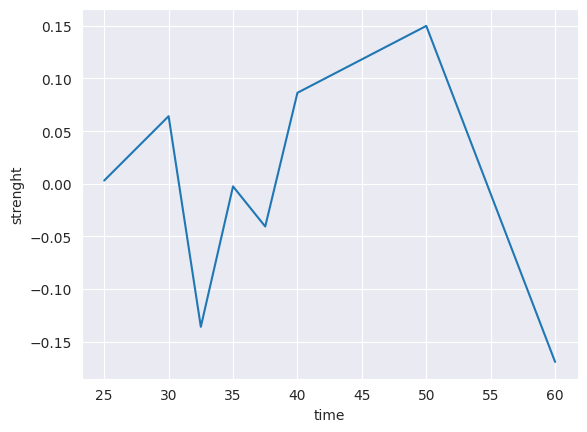

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
hero_own_st = list(hero_stats_time[59].items())
for i in range(len(hero_own_st)):
  hero_own_st[i]=list(hero_own_st[i])
  game_time=hero_own_st[i][0]
  time_category = None
  if game_time == 1:
      time_category = 25
  elif game_time == 2:
      time_category = 30
  elif game_time == 3:
      time_category = 32.5
  elif game_time == 4:
      time_category = 35
  elif game_time == 5:
      time_category = 37.5
  elif game_time == 6:
      time_category = 40
  elif game_time == 7:
      time_category = 50
  elif game_time == 8:
      time_category = 60
  hero_own_st[i][0]=time_category
gg=pd.DataFrame(hero_own_st,columns=['time', 'strenght'])
sns.set_style("darkgrid")
sns.lineplot(data=gg, x="time", y="strenght")

In [ ]:
train = pd.DataFrame()

train['r_synergy'] = data[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)
train['d_synergy'] = data[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)

train['r_time'] = data.apply(lambda x: time_strenght(x[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), x['duration']), axis=1)
train['d_time'] = data.apply(lambda x: time_strenght(x[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist(), x['duration']), axis=1)

train['csynergy'] = data.apply(lambda row: counter_synergy(row[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), row[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist()), axis=1)
train

,r_synergy,d_synergy,r_time,d_time,csynergy
0,0.542335,0.534120,-0.041969,-0.117468,0.018983
1,0.489717,0.471569,0.021094,-0.051753,0.109756
2,0.529807,0.510790,0.017799,0.005795,0.100524
3,0.515836,0.434831,-0.002896,-0.004667,0.076250
4,0.497146,0.483657,0.037845,-0.020335,-0.008919
...,...,...,...,...,...
5560,0.463237,0.519523,-0.034645,0.002537,-0.023270
5561,0.478281,0.466881,0.021208,0.007308,0.044062
5562,0.497625,0.480441,0.023491,0.000293,0.066392
5563,0.507100,0.510618,0.008843,-0.010588,-0.012303


In [ ]:
!pip install optuna
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
y = target
X = train

In [ ]:
def evaluate_lgbm(params):
    params["objective"] = "binary"
    params["metric"] = "binary_logloss"
    params["boosting_type"] = "gbdt"
    params["verbosity"] = -1
    params["n_jobs"] = -1

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx].values.ravel(), y.iloc[val_idx].values.ravel()

        model = lgb.LGBMClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="binary_error",
            callbacks = [lgb.early_stopping(100,verbose=False)]
        )

        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        aucs.append(auc)

    return np.mean(aucs)


In [ ]:
def objective(trial):
    params = {
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 5.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 5.0),
        "n_estimators": 1000,
    }

    return evaluate_lgbm(params)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

In [ ]:
best_params = study.best_params.copy()
best_params.update({
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "verbosity": -1,
    "n_jobs": -1,
})

final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(bagging_fraction=0.6001337645021658, bagging_freq=8,
               feature_fraction=0.9167013213560182, lambda_l1=4.263501571660229,
               lambda_l2=4.697388993527136, learning_rate=0.03328920032190045,
               metric='binary_logloss', min_child_samples=34, n_jobs=-1,
               num_leaves=186, objective='binary', verbosity=-1)

In [ ]:
joblib.dump(final_model, "model.pkl")

['model.pkl']

In [ ]:
model = joblib.load("model.pkl")


In [ ]:
# вероятность победы Radiant
proba = model.predict_proba(X)[:, 1]

# бинарный прогноз (0 = Dire win, 1 = Radiant win)
pred = model.predict(X)


In [ ]:
acc = accuracy_score(y, pred)
auc = roc_auc_score(y, proba)
print(f"Final Accuracy: {acc:.4f}")
print(f"Final AUC: {auc:.4f}")


Final Accuracy: 0.9364
Final AUC: 0.9851


In [ ]:
def prediction(radiant, dire, model):
  r_synergy_val = synergy(radiant)
  d_synergy_val = synergy(dire)
  csynergy_val = counter_synergy(radiant, dire)

  local_data = []
  for duration in range(1,9):
    local_data.append([
              r_synergy_val,
              d_synergy_val,
              csynergy_val,
              time_strenght(radiant, duration, duration),
              time_strenght(dire, duration, duration)
              ])

  proba = model.predict_proba(local_data)
  return {"Radiant": proba[0][1], "Dire": proba[0][0], "Time": 1}, {"Radiant": proba[1][1], "Dire": proba[1][0], "Time": 2},\
    {"Radiant": proba[2][1], "Dire": proba[2][0], "Time": 3}, {"Radiant": proba[3][1], "Dire": proba[3][0], "Time": 4},\
     {"Radiant": proba[4][1], "Dire": proba[4][0], "Time": 5}, {"Radiant": proba[5][1], "Dire": proba[5][0], "Time": 6},\
     {"Radiant": proba[6][1], "Dire": proba[6][0], "Time": 7}, {"Radiant": proba[7][1], "Dire": proba[7][0], "Time": 8}

In [ ]:
prediction(
    [
     1,1,1,1,1
     ],[
     3,2,2,2,2
     ],
    model)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


({'Radiant': np.float64(0.337159204470505),
  'Dire': np.float64(0.662840795529495),
  'Time': 1},
 {'Radiant': np.float64(0.08318481218630873),
  'Dire': np.float64(0.9168151878136913),
  'Time': 2},
 {'Radiant': np.float64(0.27940858739600083),
  'Dire': np.float64(0.7205914126039992),
  'Time': 3},
 {'Radiant': np.float64(0.9472754826138814),
  'Dire': np.float64(0.05272451738611861),
  'Time': 4},
 {'Radiant': np.float64(0.06899174759113565),
  'Dire': np.float64(0.9310082524088643),
  'Time': 5},
 {'Radiant': np.float64(0.05752071458447051),
  'Dire': np.float64(0.9424792854155295),
  'Time': 6},
 {'Radiant': np.float64(0.4238130835451205),
  'Dire': np.float64(0.5761869164548795),
  'Time': 7},
 {'Radiant': np.float64(0.06899174759113565),
  'Dire': np.float64(0.9310082524088643),
  'Time': 8})